# Customers Churn Rate

**Description**: This project is aim to understand the churn rate of customers in a company using a machine learning classification model in order to increase the company's profit or revenue margin and customer retention

# Hypothesis
<b>Null Hypothesis: Customers with high monthly charges do not have the tendency to churn<b>

<b>Alternate Hypothesis:Customers with high monthly Charges have the tendency to churn<b>


nalytical Questions
1. Which payment method is the most popular?
2. Which internet service was purchased the most?
3. Which gender recorded the highest churn
4. Which one of the contract types did the highest churn
5. Which age group did the highest churn
6. Does high monthly charges affect the churn rate

# Importation of Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc 
from dotenv import dotenv_values
from scipy import stats
import statistics as stat
import warnings
import os 
import seaborn as sns
warnings.filterwarnings('ignore')

<b>Loading of Environment<b>

In [2]:
# load environment variables
enviroment_variables = dotenv_values('.env')

# get values for the credentials in the .env
server = enviroment_variables.get("SERVER")
username = enviroment_variables.get("USERNAME")
password = enviroment_variables.get("PASSWORD")
database = enviroment_variables.get("DATABASE")
# table_name = enviroment_variables.get("TABLENAME")


In [3]:
# code to connect to the server, user name, password, database and table

conn_str =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [4]:
# connection to the server using the pyodbc
connection = pyodbc.connect(conn_str)


# Loading of the data sets for the analysis

In [13]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

churn_data = pd.read_sql(query, connection)

In [7]:
churn_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [14]:
churn_data['SeniorCitizen'].unique()

array([False,  True])

In [9]:
# Second dataset
data_2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [10]:
# third dataset
data_3 = pd.read_excel('Telco-churn-second-2000.xlsx')

# Exploratory Data Analysis (EDA)

In [12]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [ ]:
# checking for the duplicates on the train data
churn_data.duplicated().sum()

0

In [ ]:
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

From above there are missing vlalues in some of the columns like MultipleLines,OnlineSecurity,OnlineBackup 651 values, DeviceProtection 651 values, 
TechSupport 651 values, StreamingTV 651 values, StreamingMovies 651 values.

In [ ]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [ ]:
churn_data.describe(include=object).T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [ ]:
churn_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
churn_data['MonthlyCharges'].unique()

array([29.85000038, 56.95000076, 53.84999847, ..., 33.90000153,
       34.        , 38.59999847])

In [ ]:
churn_data['TotalCharges'].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ..., 6143.14990234,
        144.80000305,  414.95001221])

### Merging of the two data together for visualization and understanding of data for preparation

In [15]:
#Merging the SQL and CSV dataset

data= pd.concat([churn_data,data_2])
data.to_csv('data_churn.csv')

In [16]:
data_df= pd.read_csv('data_churn.csv')
data_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [ ]:
# checking the shape of the data
data_df.shape

(5043, 22)

In [ ]:
# check the data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [17]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5043.0,1305.651993,801.484415,0.0,630.000,1260.000000,1890.500000,2999.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [18]:
data_df.drop('customerID',axis=1, inplace=True)

In [19]:
data_df.drop('Unnamed: 0',axis=1, inplace=True)

In [20]:
data_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


In [21]:
data_df.shape

(5043, 20)

In [22]:
data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data_df.dtypes

gender               object
SeniorCitizen         int32
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [41]:
# cheking for the missing values
data_df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

### From the the data seniorcitizen some are false and true while some are 0 and 1 so i have to unifies them to be same data type

In [23]:
data_df['SeniorCitizen'].replace({'False': 0, 'True':1}, inplace=True)
data_df['SeniorCitizen']=data_df['SeniorCitizen'].astype(int)
data_df['MonthlyCharges']=data_df['MonthlyCharges'].astype(float)
data_df['SeniorCitizen'].unique()

array([0, 1])

### changing the TotalCharges column to float

In [25]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'], errors='coerce')
data_df['TotalCharges']=data_df['TotalCharges'].astype(float)
data_df['TotalCharges'].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ...,  346.45      ,
        306.6       , 6844.5       ])

In [ ]:
data_df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5041,Male,1,True,False,4,True,True,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Mailed check,74.40,306.6,True
5042,Male,0,False,False,66,True,False,Fiber optic,True,False,True,True,True,True,Two year,True,Bank transfer (automatic),105.65,6844.5,False


from the concated data set we observed that the categorical columns are not unique that is some have yes and No while some are True or False so we need to rename the to gbe uniqucally the same

In [26]:
data_df['Partner'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['Dependents'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['PhoneService'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['MultipleLines'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['InternetService'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['OnlineSecurity'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['OnlineBackup'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['DeviceProtection'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['TechSupport'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['StreamingTV'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['StreamingMovies'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['PaperlessBilling'].replace({'No':'False','Yes':'True'}, inplace=True)
data_df['Churn'].replace({'No':'False','Yes':'True'}, inplace=True)

# Univariate Analysis

#### visualization of Numeric columns

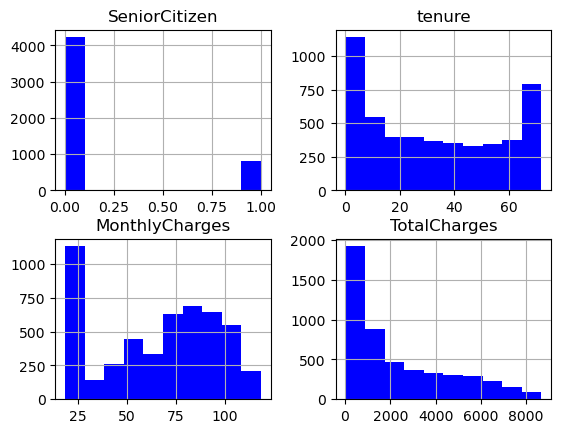

In [33]:

data_df.hist(color='blue')
plt.show()

In [ ]:
data_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


#### visualization of categorical columns

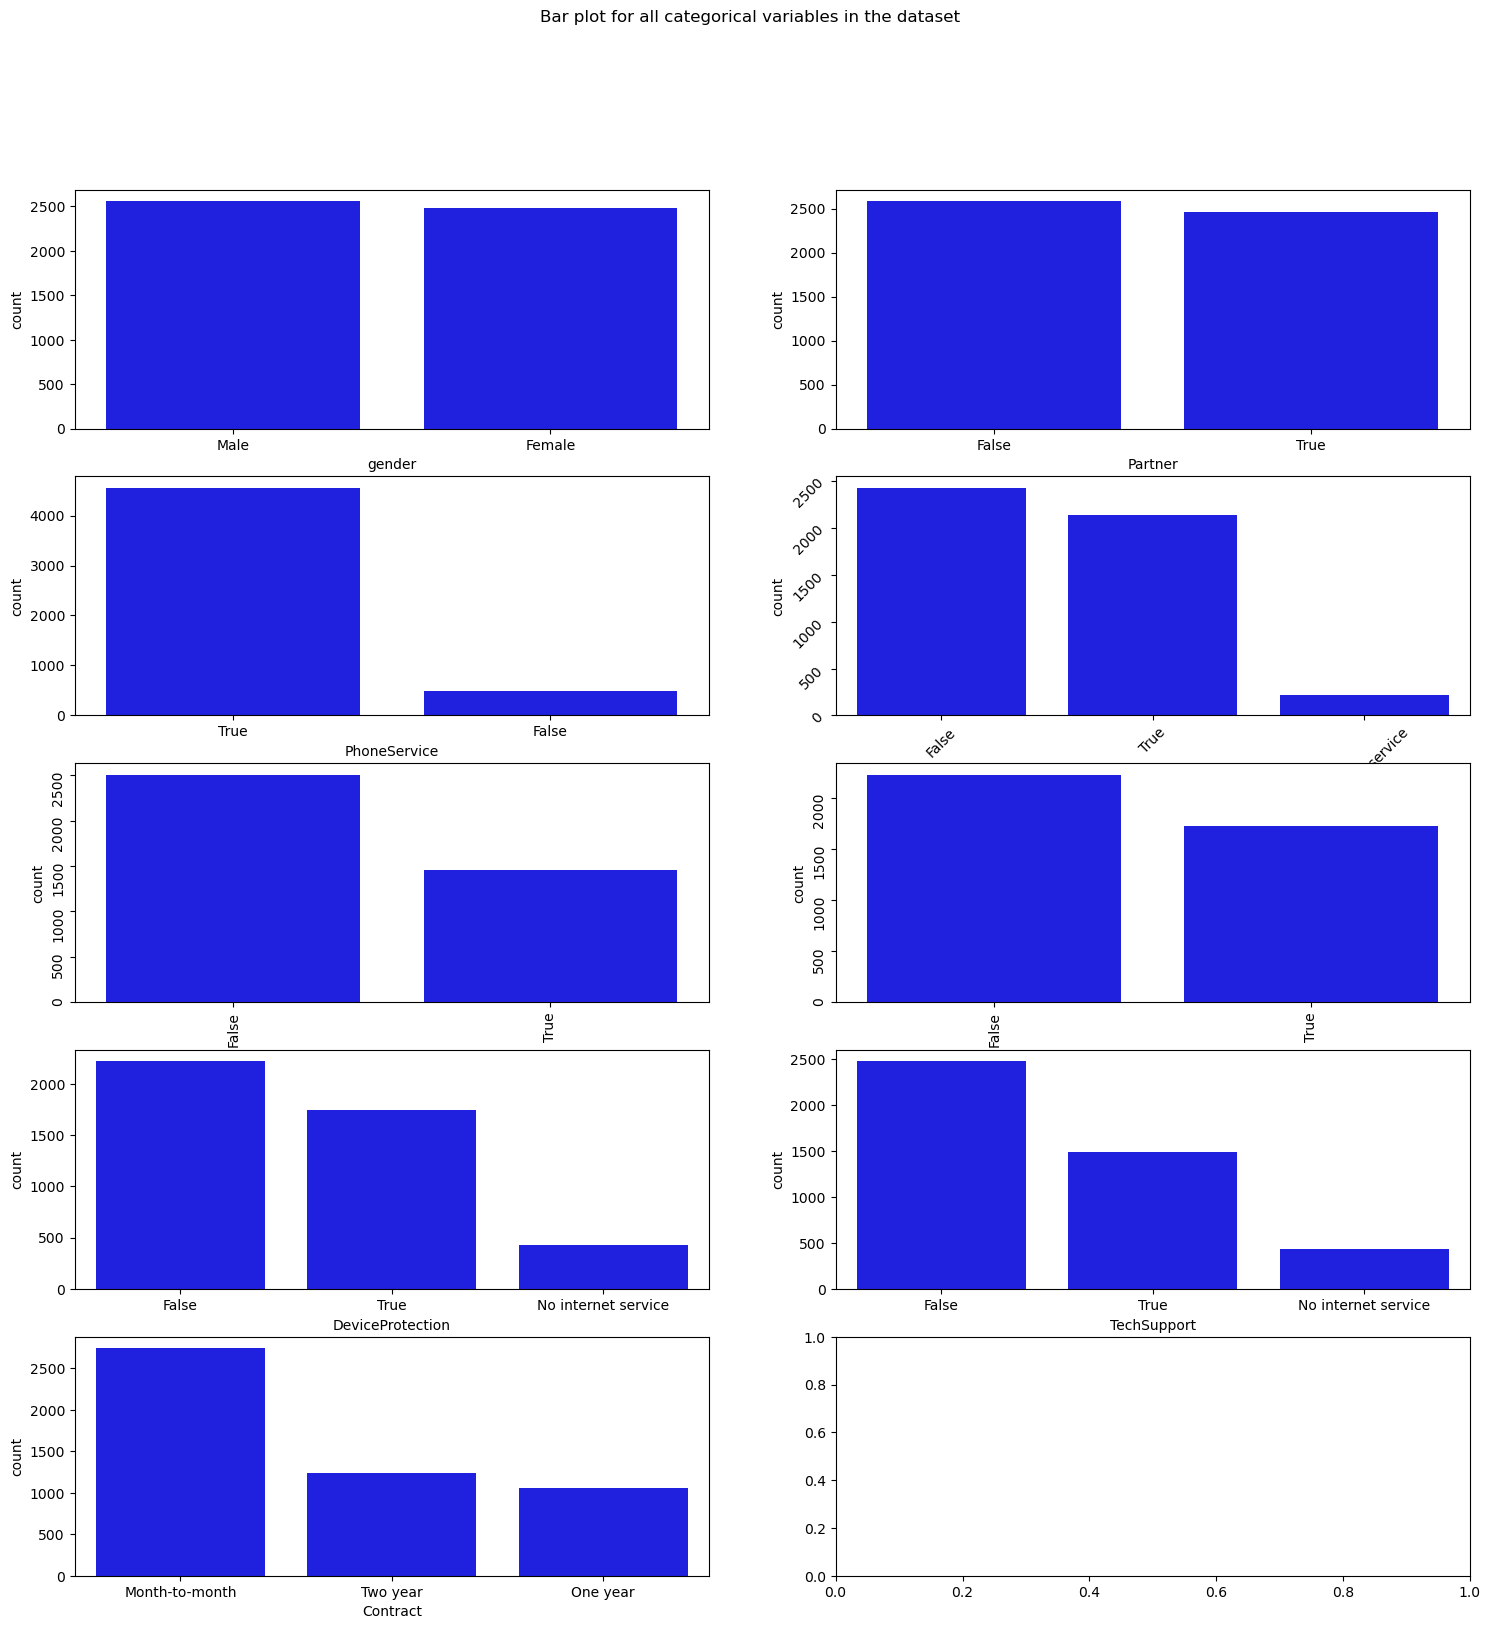

In [34]:
fig, axes = plt.subplots(5, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'gender', data = data_df, color = 'blue', 
              order = data_df['gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Partner', data = data_df, color = 'blue', 
              order = data_df['Partner'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'PhoneService', data = data_df, color = 'blue', 
              order = data_df['PhoneService'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'MultipleLines', data = data_df, color = 'blue', 
              order = data_df['MultipleLines'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'OnlineSecurity', data = data_df, color = 'blue', 
              order = data_df['OnlineSecurity'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'OnlineBackup', data = data_df, color = 'blue', 
              order = data_df['OnlineBackup'].head(20).value_counts().index);
sns.countplot(ax=axes[3,0], x='DeviceProtection', data= data_df, color='blue',
              order=data_df['DeviceProtection'].value_counts().index);
sns.countplot(ax= axes[3,1], x='TechSupport', data=data_df, color='blue', order=data_df['TechSupport'].value_counts().index);
sns.countplot(ax= axes[4,0], x='Contract', data=data_df, color='blue', order=data_df['Contract'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

<Axes: ylabel='Density'>

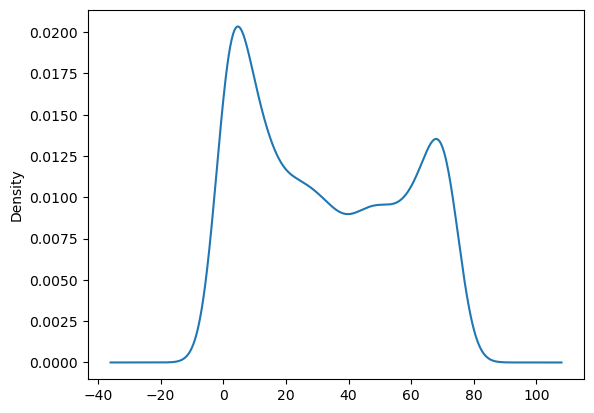

In [ ]:
churn_data['tenure'].plot(kind='kde')

From the visualization above our data is not normally distributed because none of them has bell shape curve

# Bivariant Analysis

In [42]:
corr= data_df.corr()

<Axes: >

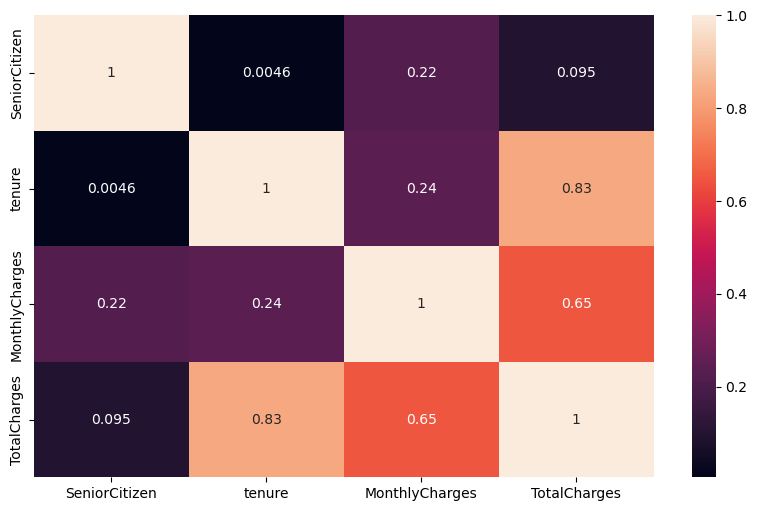

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,annot=True)

#### From the hitmap above the datas are not numerically corelated

In [ ]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Multivariate Analysis

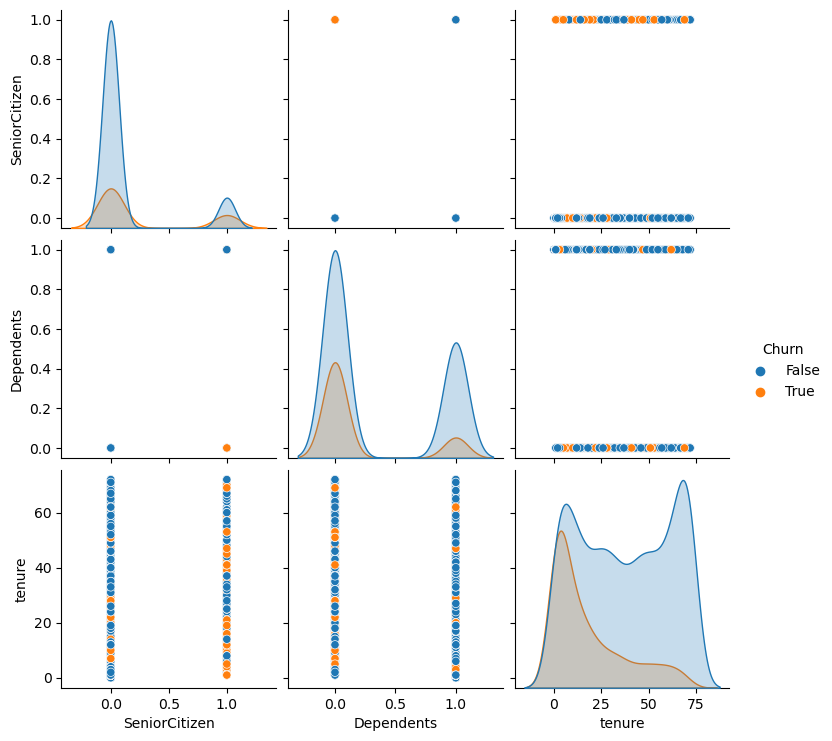

In [ ]:
data=churn_data[['Contract','SeniorCitizen', 'Dependents','tenure','Churn']]
sns.pairplot(data, hue='Churn')
plt.show()


Analytical Questions
1. Which payment method is the most popular?
2. Which internet service was purchased the most?
3. Which gender recorded the highest churn
4. Which one of the contract types did the highest churn
5. Which age group did the highest churn
6. Does high monthly charges affect the churn rate

## 1a. which payment method is the most popular

<Axes: xlabel='PaymentMethod', ylabel='count'>

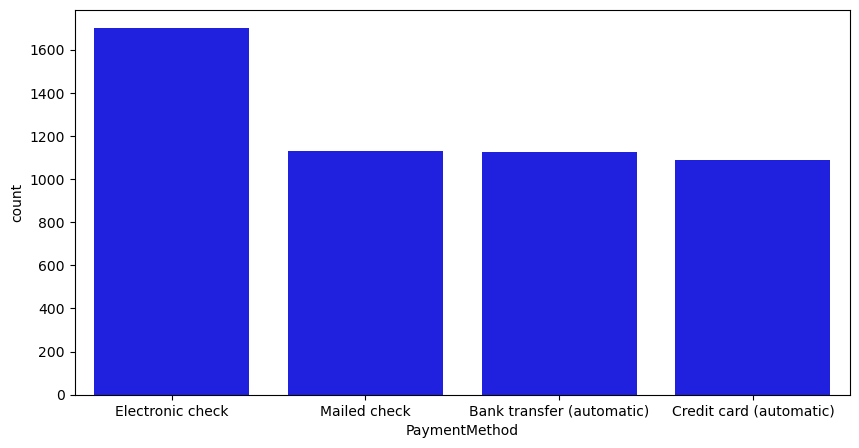

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=data_df, x='PaymentMethod', color='blue')

## 1b. Which payment method is the most popular?

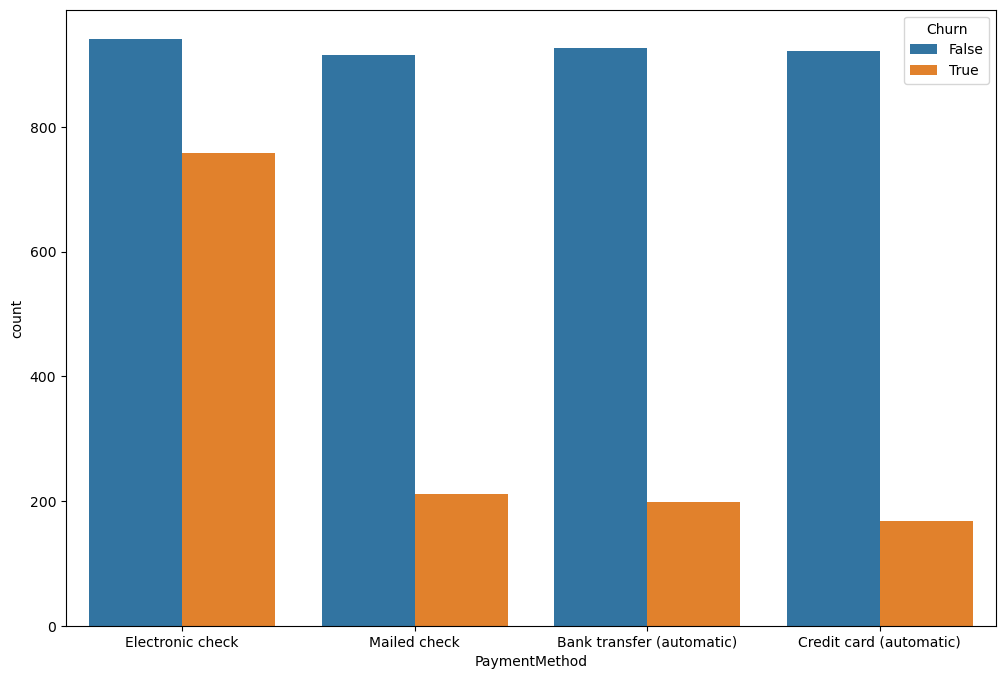

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(data=data_df, x='PaymentMethod', hue='Churn')
plt.show()

## 2a. Which internet service was purchased the most?

<Axes: xlabel='InternetService', ylabel='count'>

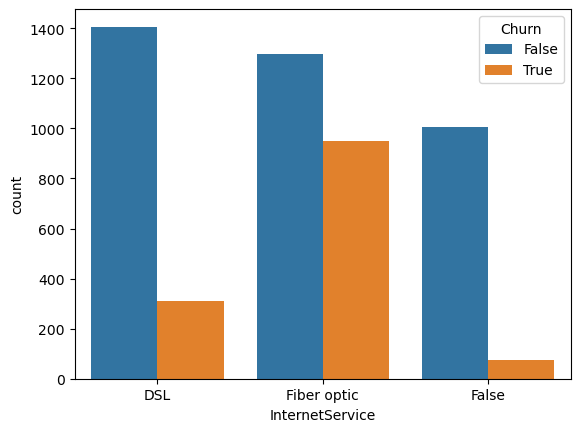

In [47]:
sns.countplot(data=data_df, x='InternetService', hue= 'Churn')

## 3. Which gender recorded the highest churn

<Axes: xlabel='gender', ylabel='count'>

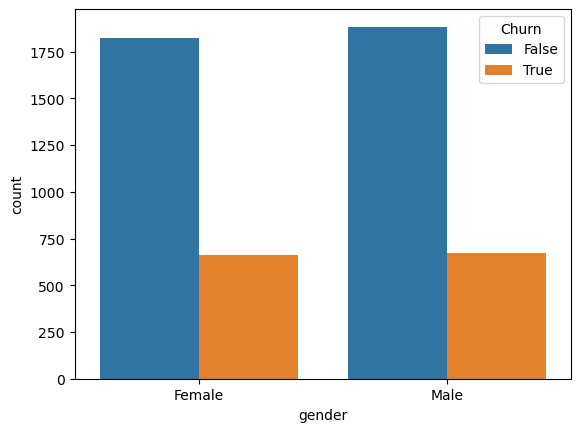

In [48]:
sns.countplot(data=data_df, x='gender', hue='Churn')

## 4. Which one of the contract types did the highest churn

<Axes: xlabel='Contract', ylabel='count'>

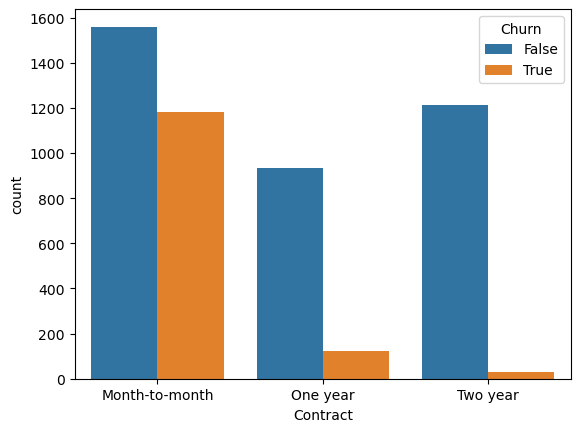

In [52]:
sns.countplot(data=data_df, x='Contract', hue="Churn")



## 5. Which age group did the highest churn

<Axes: xlabel='SeniorCitizen', ylabel='count'>

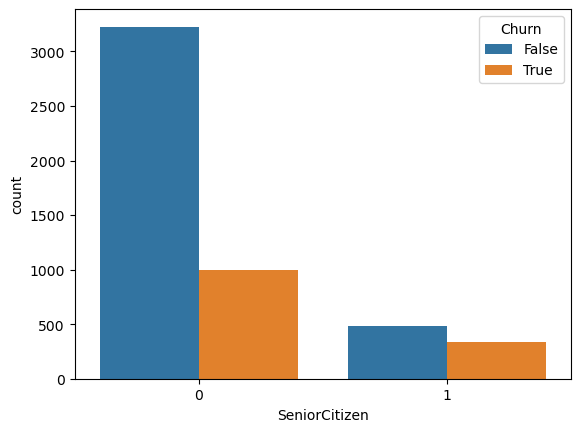

In [53]:
sns.countplot(data=data_df, x='SeniorCitizen', hue='Churn')

## 6. Does high monthly charges affect the churn rate

<Axes: ylabel='TotalCharges'>

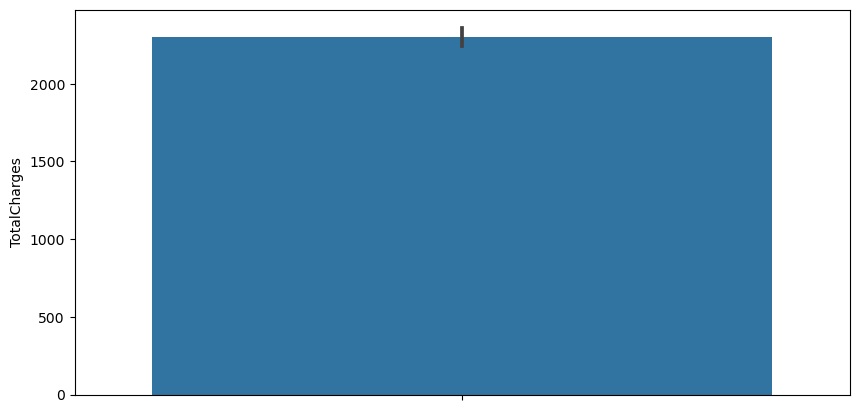

In [58]:
plt.figure(figsize=(10,5))
sns. barplot(data=data_df, y='TotalCharges', hue='Churn')